## 코사인 유사도(Cosine Similarity)

파이썬에서는 코사인 유사도를 구하는 방법은 여러가지가 있는데 여기서는 Numpy를 이용해서 계산해보겠습니다.

In [0]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))



*   문서1 : 저는 사과 좋아요
*   문서2 : 저는 바나나 좋아요
*   문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

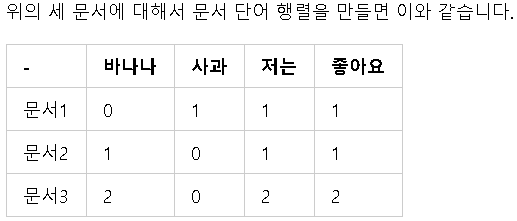






코사인 유사도를 계산하는 함수를 만들었습니다.

In [0]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

예를 들었던 문서1, 문서2, 문서3에 대해서 각각 BoW를 만들었습니다. 이제 각 문서에 대한 코사인 유사도를 계산해보겠습니다.

In [3]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


## 2. 유사도를 이용한 추천 시스템 구현하기
캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보겠습니다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.

캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보겠습니다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.

다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset

원본 파일은 위 링크에서 movies_metadata.csv 파일을 다운로드 받으면 됩니다. 해당 데이터는 총 24개의 열을 가진 45,466개의 샘플로 구성된 영화 정보 데이터입니다.

In [8]:
import pandas as pd
data = pd.read_csv(r'movies_metadata.csv', low_memory=False)
# 예를 들어 윈도우 바탕화면에 해당 파일을 위치시킨 저자의 경우
# pd.read_csv(r'C:\Users\USER\Desktop\movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


훈련 데이터는 총 24개의 열을 갖고있으나, 책의 지면상 일부 생략하였습니다. 여기서 코사인 유사도에 사용할 데이터는 영화 제목에 해당하는 title 열과 줄거리에 해당하는 overview 열입니다. 좋아하는 영화를 입력하면, 해당 영화의 줄거리와 줄거리가 유사한 영화를 찾아서 추천하는 시스템을 만들 것입니다.

In [0]:
data=data.head(20000)

만약 훈련 데이터의 양을 줄이고 학습을 진행하고자 한다면, 이와 같이 데이터를 줄여서 재저장할 수 있습니다. 저는 20,000개의 샘플만 가지고 학습해보겠습니다. tf-idf를 할 때 데이터에 Null 값이 들어있으면 에러가 발생합니다. tf-idf의 대상이 되는 data의 overview 열에 Null 값이 있는지 확인합니다.

In [10]:
data['overview'].isnull().sum()

135

135개의 샘플에서 Null 값이 있다고 합니다. pandas를 이용하면 Null 값을 처리하는 도구인 fillna()를 사용할 수 있습니다. 괄호 안에 Null 대신 넣고자하는 값을 넣으면 되는데, 이 경우에는 빈 값(empty value)으로 대체하여 Null 값을 제거합니다.

In [0]:
data['overview'] = data['overview'].fillna('')
# overview에서 Null 값을 가진 경우에는 값 제거

Null 값을 제거하였습니다. 이제 .isnull().sum()를 수행하면 0의 값이 나옵니다. 이제 tf-idf를 수행합니다.

In [12]:
data['overview'].isnull().sum()

0

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(data['overview'])
# overview에 대해서 tf-idf 수행
print(tfidf_matrix.shape)
print(tfidf_matrix)

(20000, 47487)
  (0, 11645)	0.13942792746208266
  (0, 2811)	0.1524688231743182
  (0, 24325)	0.10272285889754121
  (0, 14393)	0.10323587624822204
  (0, 12920)	0.13359137839416452
  (0, 30780)	0.10362949000778948
  (0, 37778)	0.13329592929044795
  (0, 7974)	0.13030575543855816
  (0, 32424)	0.13359137839416452
  (0, 19047)	0.10485920860731182
  (0, 32291)	0.09637786759647918
  (0, 25229)	0.12052668500637997
  (0, 1254)	0.1489611323980068
  (0, 37166)	0.11699407550916606
  (0, 24759)	0.19553422928903877
  (0, 6290)	0.5036643709879097
  (0, 5775)	0.10961099833635705
  (0, 4736)	0.12600776612424489
  (0, 36185)	0.11514050233158798
  (0, 18727)	0.13359137839416452
  (0, 24957)	0.09146351035625488
  (0, 43131)	0.15491381382108724
  (0, 2051)	0.4159373110833513
  (0, 46617)	0.46474144146326174
  (0, 24361)	0.10943293956646011
  :	:
  (19997, 13221)	0.17897321248705433
  (19997, 37592)	0.15166031585027698
  (19997, 45919)	0.1821847673691749
  (19997, 46772)	0.14244710628029003
  (19997, 21552)	0

overview 열에 대해서 tf-idf를 수행했습니다. 20,000개의 영화를 표현하기위해 총 47,487개의 단어가 사용되었음을 보여주고 있습니다. 이제 코사인 유사도를 사용하면 바로 문서의 유사도를 구할 수 있습니다.

In [0]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

영화의 타이틀과 인덱스를 가진 테이블을 만듭니다. 이 중 5개만 출력해보도록 하겠습니다.이 테이블의 용도는 영화의 타이틀을 입력하면 인덱스를 리턴하기 위함입니다.

In [18]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [19]:
idx = indices['Father of the Bride Part II']
print(idx)

4


In [0]:
#이제 선택한 영화에 대해서 코사인 유사도를 이용하여, 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.

def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [21]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

In [24]:
get_recommendations('Toy Story')

15348               Toy Story 3
2997                Toy Story 2
10301    The 40 Year Old Virgin
8327                  The Champ
1071      Rebel Without a Cause
11399    For Your Consideration
1932                  Condorman
3057            Man on the Moon
485                      Malice
11606              Factory Girl
Name: title, dtype: object